In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Import

In [5]:
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

2. Split into train and test sets

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


3. Training regression

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #X - independent vars of the training set, Y dependent vars vector

LinearRegression()

4. Prediction

In [10]:
y_pred = regressor.predict(X_test) #predicted salaries
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

5. Simple visualization

Text(0, 0.5, 'Salary')

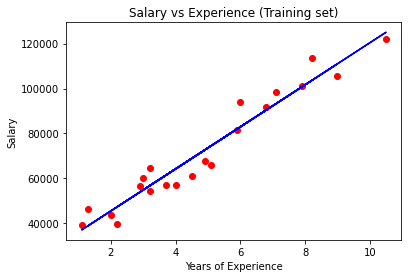

In [11]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')


Text(0, 0.5, 'Salary')

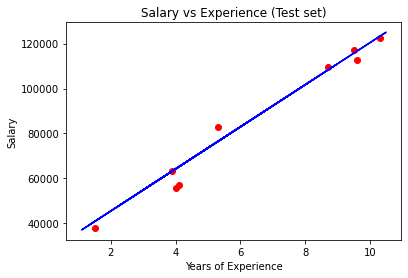

In [12]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

6. Simple linear regression from scratch
<img src="m.png">


In [13]:
def SimpleRegression(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)

    num = 0
    den = 0

    for i in range(len(X)):
        num += (X[i] - mean_X) * (y[i] - mean_y)
        den += (X[i] - mean_X)

    m = num/den
    c = mean_y - (m * mean_X)
    
    return c, m


In [14]:
c, m = SimpleRegression(X, y)
print('c:',c, 'm:',m)

c: [-6.60169531e+21] m: [1.24247716e+21]


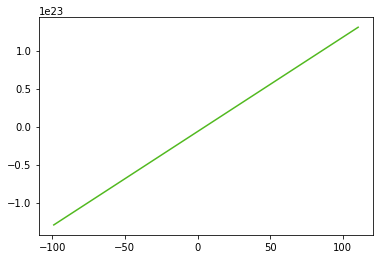

In [15]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y1 = c + m * x 

plt.plot(x, y1, color='#52b920', label='Regression Line')